In [1]:
 # !git clone https://github.com/NSCC-COGS/GDAA2030.git

Cloning into 'GDAA2030'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 421 (delta 16), reused 9 (delta 1), pack-reused 370
Receiving objects: 100% (421/421), 32.49 MiB | 27.38 MiB/s, done.
Resolving deltas: 100% (174/174), done.


In [2]:
 % pip install tifffile
 %cd /content/GDAA2030/tutorial2/thorneman

     |████████████████████████████████| 133kB 4.6MB/s 
     |████████████████████████████████| 18.1MB 243kB/s 
/content/GDAA2030/tutorial2/thorneman


                                  productId  ...                                       download_url
0  LC08_L1TP_149039_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
1  LC08_L1TP_012001_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
2  LC08_L1TP_012002_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
3  LC08_L1TP_012010_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
4  LC08_L1TP_012011_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...

[5 rows x 12 columns]
0    2017-04-11 05:36:29.349932
1    2017-04-11 15:14:40.001201
2    2017-04-11 15:15:03.871058
3    2017-04-11 15:18:14.918879
4    2017-04-11 15:18:38.780265
5    2017-04-11 15:21:49.747601
6    2017-04-11 15:23:25.248212
7    2017-04-11 15:24:36.887439
8    2017-04-11 15:25:48.526665
9    2017-04-11 15:26:12.404996
10   2017-04-11 15:27:00.174364
11   2017-04-11 16:52:45.

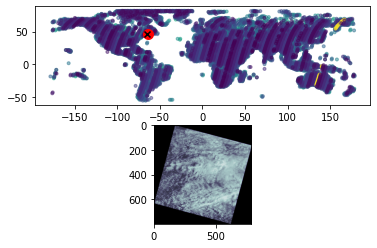

In [3]:
import GDAA2030_T2_FUNCTIONS_BENMANTHORNE as glf 

## this code will allow an input coordinate 
## then search for the nearest landsat 8 scene 
## for a given band based on a scene list 
## we will also filter by cloud cover % 

lat = 46.22 
lon = -64.55 
band = 1 
cloudCoverMax = 2 
sceneList = "https://landsat-pds.s3.amazonaws.com/c1/L8/scene_list.gz"
sceneTest = 20 # small number or none for test 
imageDir = r'.\images'

scene = glf.loadSceneList(sceneList, sceneTest, cloudCoverMax)
sceneDf = glf.loadSceneList(sceneList)

path,row = glf.findPathRow(sceneDf, lat, lon)

# print(path,row) 

selectedScene = glf.selectScene(sceneDf, path, row)

print(selectedScene)

imageUrl, imagePath = glf.getImageIO(selectedScene, band, imageDir)

# calls the downloadImage function to collect the image from its online source
glf.downloadImage(imageUrl,imagePath)

# calls the plotResults function to show the image and where it was pulled from
glf.plotResults(lat,lon,selectedScene,sceneDf,imagePath)